In [1]:
import numpy as np
import pandas as pd
import os
import datetime as dt
from datetime import datetime, date, timedelta
import warnings
import sklearn
from sklearn import metrics
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score

import yfinance as yf
import numpy as np
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import urllib.request, json
from pandas import json_normalize
import math
import scipy.stats as sp

# The first thing we want to do is import the Pandas library and set the filepath to our data file
import pandas as pd
import pandas_ta as ta
import warnings
from pandas.tseries.offsets import DateOffset
import warnings
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from itertools import groupby, chain
from collections import OrderedDict

import quandl
quandl.ApiConfig.api_key = 'soxd-469x3Zp4ib_4uzc'
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score


In [2]:

df_MKPRU = quandl.get("BCHAIN/MKPRU", authtoken="soxd-469x3Zp4ib_4uzc") # price
df_MWNUS = quandl.get("BCHAIN/MWNUS", authtoken="soxd-469x3Zp4ib_4uzc")
df_HRATE = quandl.get("BCHAIN/HRATE", authtoken="soxd-469x3Zp4ib_4uzc")
df_DIFF = quandl.get("BCHAIN/DIFF", authtoken="soxd-469x3Zp4ib_4uzc")
df_MIREV = quandl.get("BCHAIN/MIREV", authtoken="soxd-469x3Zp4ib_4uzc")
df_CPTRA = quandl.get("BCHAIN/CPTRA", authtoken="soxd-469x3Zp4ib_4uzc")
df_TRVOU = quandl.get("BCHAIN/TRVOU", authtoken="soxd-469x3Zp4ib_4uzc")
#df_CPTRV = quandl.get("BCHAIN/CPTRV", authtoken="soxd-469x3Zp4ib_4uzc")
df_ETRVU = quandl.get("BCHAIN/ETRVU", authtoken="soxd-469x3Zp4ib_4uzc")
df_ETRAV = quandl.get("BCHAIN/ETRAV", authtoken="soxd-469x3Zp4ib_4uzc")
df_TOUTV = quandl.get("BCHAIN/TOUTV", authtoken="soxd-469x3Zp4ib_4uzc")
df_NTRBL = quandl.get("BCHAIN/NTRBL", authtoken="soxd-469x3Zp4ib_4uzc")
df_NTRAT = quandl.get("BCHAIN/NTRAT", authtoken="soxd-469x3Zp4ib_4uzc")
df_NADDU = quandl.get("BCHAIN/NADDU", authtoken="soxd-469x3Zp4ib_4uzc")
df_NTREP = quandl.get("BCHAIN/NTREP", authtoken="soxd-469x3Zp4ib_4uzc")
df_NTRAN = quandl.get("BCHAIN/NTRAN", authtoken="soxd-469x3Zp4ib_4uzc")
df_TRFUS = quandl.get("BCHAIN/TRFUS", authtoken="soxd-469x3Zp4ib_4uzc")
df_TRFEE = quandl.get("BCHAIN/TRFEE", authtoken="soxd-469x3Zp4ib_4uzc")
df_MKTCP = quandl.get("BCHAIN/MKTCP", authtoken="soxd-469x3Zp4ib_4uzc")
df_TOTBC = quandl.get("BCHAIN/TOTBC", authtoken="soxd-469x3Zp4ib_4uzc")
#df_MWNTD = quandl.get("BCHAIN/MWNTD", authtoken="soxd-469x3Zp4ib_4uzc")   # HASTA AYER
#df_MWTRV = quandl.get("BCHAIN/MWTRV", authtoken="soxd-469x3Zp4ib_4uzc")   # HASTA AYER

df_AVBLS = quandl.get("BCHAIN/AVBLS", authtoken="soxd-469x3Zp4ib_4uzc")
df_BLCHS = quandl.get("BCHAIN/BLCHS", authtoken="soxd-469x3Zp4ib_4uzc")
df_ATRCT = quandl.get("BCHAIN/ATRCT", authtoken="soxd-469x3Zp4ib_4uzc")

In [3]:
class target:
    
    def __init__(self,df,column_date='date'):
        self.df = df
        self.column_date = column_date
       
    def max_min(self, initial_days=0, days=10, column_target='high', method=max):
        df = self.df
        column_date = self.column_date

        df_target = df[[column_date,column_target]].copy()
        df_target_original = df_target.copy()
        list_of_targets=[column_date]
        #in loop add one column per day
        for i in range(initial_days,days+1):
            df_target_temp = df_target_original.copy()
            df_target_temp[column_date+str(i)] = df_target_temp[column_date] + pd.Timedelta(days=-i)
            df_target_temp = df_target_temp[[column_date+str(i),column_target]].rename(columns={column_target:column_target+str(i)})
            df_target=pd.merge(df_target,df_target_temp, how='left',left_on=column_date, right_on=column_date+str(i))
            df_target = df_target.dropna()
            list_of_targets.append(column_target+str(i))
       
        df_target = df_target[list_of_targets]
        if method==max:
            df_target['target'] = df_target[list_of_targets].max(axis=1)
        if method==min:
            df_target['target'] = df_target[list_of_targets].min(axis=1)
        df_target=df_target[[column_date, 'target']]
        df_target = df_target.sort_values([column_date], ascending=[True]).reset_index(drop=True).sort_values([column_date], ascending=[False])
       
        return(df_target)  
   
    def close(self, days=10,column_target='close'):
        df = self.df
        column_date = self.column_date    
        df_target = df[[column_date,column_target]].copy()
        df_target[column_date+ "_-_" +str(days)] = df_target[column_date] + pd.Timedelta(days=-days)
        df_target = df_target.drop(columns=column_date, axis=1)
        dictionary={column_date+ "_-_" +str(days):column_date, column_target:'target'}
        df_target = df_target.rename(columns=dictionary)
        df_target = df_target[[column_date, 'target']]
        return (df_target)
   
    def direction(self,days=10,column_target='close', column_high='high', column_low='low'):
        df = self.df
        column_date = self.column_date
        df_close = df[[column_date, 'close']].copy()
        df_target_max = target(df).max_min(method=max).rename(columns={'target':'max'})
        df_target_min = target(df).max_min(method=min, column_target='low').rename(columns={'target':'min'})
        df_target_close = target(df).close().rename(columns={'target':'target_close'})
        df_final = pd.merge(df_close, df_target_max, on=column_date, how='inner')
        df_final = pd.merge(df_final, df_target_min, on=column_date, how='inner')
        df_final = pd.merge(df_final, df_target_close, on=column_date, how='inner')
        df_final['direction'] =df_final['close'] + (df_final['max'] - df_final['close']  + df_final['min'] - df_final['close'] + df_final['target_close'] - df_final['close'])/3
        df_final = df_final[['date','direction']]
        return(df_final)

def plot_table(df):
    # Create a new figure and axis
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')

    # Create the table
    the_table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

    # Modify the appearance of the table
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(14)
    the_table.auto_set_column_width(list(range(df.shape[1])))
    the_table.scale(1, 1.5)
    plt.show()
    #plt.savefig('table.jpg', format='jpg')
    return
    
def get_data_yfinance(asset, interval='1d', start='2011-01-01'):
    date_column = 'Date'
    list_of_days = ['1d', '5d', '1wk', '1mo', '3mo']
    list_of_minutes = ['1m', '2m', '5m', '15m', '30m', '60m', '90m']
    df = yf.download(asset, start=start, threads= False, interval=interval)
    df = df.reset_index()
    if interval== '1h':
        df = df.rename(columns={'index':'Date'})
    elif interval in list_of_minutes:
        df = df.rename(columns={'Datetime':'Date'})
        #df[date_column] = df[date_column].str[:]
       
    # Now that we have loaded our data into the dataframe, we can preview it using the print & .head() function
   
    df[date_column] = pd.to_datetime(df[date_column])
    df = df.sort_values([date_column], ascending=[True]).reset_index(drop=True).sort_values([date_column], ascending=[False])
    df = df.rename(columns={'Date':'date','Open':'open', 'High':'high', 'Low': 'low','Close':'close', 'Volume':'tradecount'})
    return(df)

def add_derivates(df, feature, periods=1):
    df_new = df.copy()
    diff_1 = df[[feature]].diff(periods=periods).rename(columns={feature: feature +"_diff1"})
    df_new = pd.concat([df_new, diff_1], axis=1).dropna()
    del df
    return df_new

def get_ribbons(df, sma_low, sma_high, list_of_features, date_column='date'):
    df_out=df.copy()
    list_of_columns = [date_column] + list_of_features
    df_out=df_out[list_of_columns]
    list_of_sma = []
    list_of_ribbon = []
    for i in list_of_features:
        sma_low_ = i + '_sma_' + str(sma_low)
        list_of_sma.append(sma_low_)
        df_out[sma_low_] = pd.Series.to_frame(ta.sma(df_out[i], length=sma_low))
        sma_high_ = i + '_sma_' + str(sma_high)
        list_of_sma.append(sma_high_)
        df_out[sma_high_] = pd.Series.to_frame(ta.sma(df_out[i], length=sma_high))
        ribbon_ = 'ribbon_' + i + '_' +  str(sma_low) + '_' + str(sma_high)
        list_of_ribbon.append(ribbon_)
        df_out[ribbon_] = (df_out[sma_low_] - df_out[sma_high_])
    df_out = df_out.dropna()
    return df_out

def get_ribbons_30_60(df, list_of_names_df):
    df_final=df.copy()
    list_of_sma = []
    list_of_ribbon = []
    for i in list_of_names_df:
        sma_30 = i + '_sma_30'
        list_of_sma.append(sma_30)
        df_final[sma_30] = pd.Series.to_frame(ta.sma(df_final[i], length=30))
        sma_60 = i + '_sma_60'
        list_of_sma.append(sma_60)
        df_final[sma_60] = pd.Series.to_frame(ta.sma(df_final[i], length=60))
        ribbon_30_60 = 'ribbon_' + i + '_30_60'
        list_of_ribbon.append(ribbon_30_60)
        df_final[ribbon_30_60] = (df_final[sma_30] - df_final[sma_60])
    return df_final

def create_linear_regression_of_maximums(df_in, feature_column, date_column='date'):
            
    df_out = df_in[[date_column, feature_column]]
    if date_column != 'date':
        df_out = df_out.rename(columns={date_column:'date'})
    date_column='date'
    first_date_str = df_out.iloc[0].date
    first_date = first_date_str.to_pydatetime().date()
    df_out[df_out[date_column]==first_date_str].iloc[0][1]#.CPTRA_sma_30
    maximum_date_CPTRA = {}
    today = date.today()
    number_of_years = today.year - first_date.year
    low_date = first_date
    maximum_value=0
    list_of_dates=[]
    list_of_values=[]

    for i in range(number_of_years+1):
        low_date =  first_date_str + dt.timedelta(days = 365*i)
        high_date =  first_date_str + dt.timedelta(days = 365*(i+1))
        df_filtered = df_out[(df_out[date_column] > low_date) &  (df_out[date_column] <= high_date)]
        maximum = df_filtered[[feature_column]].max()[0]#.CPTRA_sma_30
        if maximum > maximum_value:
            maximum_value = maximum
            list_of_dates.append(df_filtered[df_filtered[feature_column]==df_filtered[feature_column].max()].reset_index().iloc[0].date)
            list_of_values.append(maximum)

    dataframe_dates_maximum = pd.DataFrame(
        {date_column: list_of_dates,
        feature_column: list_of_values
        })

    total_days = (today - first_date).days
    # https://laid-back-scientist.com/en/fill-datetime
    df_ = dataframe_dates_maximum.set_index(date_column)
    df_ = df_.asfreq(freq='1440min')
    df_fill = df_.reset_index()

    # https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/
    df_dates = df_out[[date_column]].copy()
    df_new = pd.merge(df_dates, dataframe_dates_maximum, how='left', on=date_column)
    df_fill = df_new.copy()
    df_fill =df_fill.set_index(date_column)
    y=np.array(df_fill[feature_column].dropna().values, dtype=float)
    x=np.array(pd.to_datetime(df_fill[feature_column].dropna()).index.values, dtype=float)
    x_tot = np.array(pd.to_datetime(df_fill[feature_column]).index.values, dtype=float)
    slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
    xf = np.linspace(min(x_tot),max(x_tot),len(df_fill))
    xf1 = xf.copy()
    xf1 = pd.to_datetime(xf1)
    yf = (slope*xf)+intercept
    x_for_df = xf1.to_list()
    y_for_df = np.array(yf).tolist()
    name_of_feature = 'linear_regression_max_' + feature_column
    df_linear_regression_max = pd.DataFrame(
        {date_column: x_for_df,
        name_of_feature: y_for_df
        })
    df_linear_regression_max = df_linear_regression_max[df_linear_regression_max['linear_regression_max_' + feature_column]>0]
    df_linear_regression_max[date_column] = pd.to_datetime(df_linear_regression_max[date_column]).dt.date
    df_linear_regression_max[date_column] = pd.to_datetime(df_linear_regression_max[date_column])
    #df_linear_regression_max[name_of_feature] = df_linear_regression_max[name_of_feature].clip(lower=0)

    return df_linear_regression_max

def create_linear_regression_of_minimums(df_in, feature_column, date_column='date'):

    df_out = df_in[[date_column,feature_column]].copy()

    first_date_str = df_out.iloc[0].date
    first_date = first_date_str.to_pydatetime().date()
    df_out[df_out[date_column]==first_date_str].iloc[0].CPTRA_sma_30
    maximum_date_CPTRA = {}
    today = date.today()
    number_of_years = today.year - first_date.year
    low_date = first_date
    maximum_value=0
    list_of_dates=[]
    list_of_values=[]

    for i in range(number_of_years+1):
        low_date =  first_date_str + dt.timedelta(days = 365*i)
        high_date =  first_date_str + dt.timedelta(days = 365*(i+1))
        df_filtered = df_out[(df_out[date_column] > low_date) &  (df_out[date_column] <= high_date)]
        minimum = df_filtered[[feature_column]].min().CPTRA_sma_30
        try:
            list_of_dates.append(df_filtered[df_filtered[feature_column]==df_filtered[feature_column].min()].reset_index().iloc[0].date)
            list_of_values.append(minimum)
        except:
            pass

    # Now get minimum absolutes

    list_of_absolutes_dates=[]
    list_of_absolutes_values=[]    
    count=0
    length_data = len(list_of_values)
    maximum_of_minimum = list_of_values[length_data-1]
    list_of_absolutes_values.append(list_of_values[length_data-1])
    list_of_absolutes_dates.append(list_of_dates[length_data-1])
    for i in reversed(list_of_values):
        count+=1
        if i < maximum_of_minimum:
            maximum_of_minimum = i
            list_of_absolutes_values.append(i)
            list_of_absolutes_dates.append(list_of_dates[length_data-count])
        
    dataframe_dates_minimum = pd.DataFrame(
        {date_column: list_of_absolutes_dates,
        feature_column: list_of_absolutes_values
        })
    dataframe_dates_minimum = dataframe_dates_minimum[:-1] # delete last data
    total_days = (today - first_date).days           
    df_ = dataframe_dates_minimum.set_index(date_column)
    df_ = df_.asfreq(freq='1440min')
    df_fill = df_.reset_index()
    df_dates = df_out[[date_column]]
    df_new = pd.merge(df_dates, dataframe_dates_minimum, how='left', on=date_column)
    df_fill = df_new.copy()
    df_fill =df_fill.set_index(date_column)

    # https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/
    df_dates = df_out[[date_column]].copy()
    df_new = pd.merge(df_dates, dataframe_dates_minimum, how='left', on=date_column)
    df_fill = df_new.copy()
    df_fill =df_fill.set_index(date_column)
    y=np.array(df_fill[feature_column].dropna().values, dtype=float)
    x=np.array(pd.to_datetime(df_fill[feature_column].dropna()).index.values, dtype=float)
    x_tot = np.array(pd.to_datetime(df_fill[feature_column]).index.values, dtype=float)
    slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
    xf = np.linspace(min(x_tot),max(x_tot),len(df_fill))
    xf1 = xf.copy()
    xf1 = pd.to_datetime(xf1)
    yf = (slope*xf)+intercept
    x_for_df = xf1.to_list()
    y_for_df = np.array(yf).tolist()
    name_of_feature = 'linear_regression_min_' + feature_column
    df_linear_regression_min = pd.DataFrame(
        {date_column: x_for_df,
        name_of_feature : y_for_df
        })
    df_linear_regression_min = df_linear_regression_min[df_linear_regression_min['linear_regression_min_' + feature_column]>0]
    df_linear_regression_min[date_column] = pd.to_datetime(df_linear_regression_min[date_column]).dt.date
    df_linear_regression_min[date_column] = pd.to_datetime(df_linear_regression_min[date_column])
    df_linear_regression_min[name_of_feature] = df_linear_regression_min[name_of_feature].clip(lower=0)
    return df_linear_regression_min


In [4]:
# Create a Dataframe with dates

first_date = '2009-01-02'
first_date_obj = datetime.strptime(first_date, '%Y-%m-%d')

today_obj = datetime.today()
difference = today_obj - first_date_obj
total_days = difference.days
list_of_dates = []
for i in range(total_days):
    new_day = first_date_obj + timedelta(days=i)
    new_day = new_day.strftime('%Y-%m-%d')
    list_of_dates.append(new_day)
df_dates = pd.DataFrame(list_of_dates, columns=['date'])
df_dates['date'] = pd.to_datetime(df_dates['date'], format='%Y-%m-%d')

df_close_yf = get_data_yfinance('BTC-USD')
df_close_yf = df_close_yf[['date','close']]
df_MKPRU_quandul = df_MKPRU.reset_index().rename(columns={'Date':'date', 'Value':'close'})
df_close_clean = pd.merge(df_dates,df_MKPRU_quandul, on='date', how='left')
df_close_clean = pd.merge(df_close_clean,df_close_yf, on='date', how='left')
df_close_clean['close'] = df_close_clean[['close_x','close_y']].apply(lambda x: x['close_x'] if(np.all(pd.notnull(x['close_x']))) else x['close_y'], axis=1)
df_close_clean = df_close_clean[['date','close']]

df_close = df_close_clean.copy()
"""
df_direction = target(df).direction(days=7, column_target='close', column_high='close', column_low='close')
df = pd.merge(df,df_direction, on='date', how='left')
df['difference'] = (df['direction'] - df['close'])/df['close']
df['target_class']=df["difference"].apply(lambda x: 1 if x>0. else 0)
#df = df[['date','open','high','low','close', 'target_class']]
df_target = df[['date', 'close','target_class']]
"""


[*********************100%***********************]  1 of 1 completed


'\ndf_direction = target(df).direction(days=7, column_target=\'close\', column_high=\'close\', column_low=\'close\')\ndf = pd.merge(df,df_direction, on=\'date\', how=\'left\')\ndf[\'difference\'] = (df[\'direction\'] - df[\'close\'])/df[\'close\']\ndf[\'target_class\']=df["difference"].apply(lambda x: 1 if x>0. else 0)\n#df = df[[\'date\',\'open\',\'high\',\'low\',\'close\', \'target_class\']]\ndf_target = df[[\'date\', \'close\',\'target_class\']]\n'

In [5]:
#################    MAIN   #################


# PARAMETERS #
date_column = 'Date'
close_column = 'Close'
value_column = 'Value'
list_of_hash_df = [df_CPTRA, df_DIFF, df_ETRAV, df_AVBLS, df_ETRVU, df_HRATE, df_MIREV, df_MKPRU, df_MKTCP, df_NADDU, \
                   df_NTRAN, df_NTRBL, df_NTREP, df_TOTBC, df_TOUTV, df_TRFEE, df_TRFUS, df_TRVOU, df_BLCHS, df_ATRCT]
list_of_hash_names= [ 'CPTRA', 'DIFF', 'ETRAV', 'AVBLS', 'ETRVU', 'HRATE','MIREV', 'MKPRU', 'MKTCP', 'NADDU', \
                     'NTRAN', 'NTRBL', 'NTREP', 'TOTBC', 'TOUTV', 'TRFEE', 'TRFUS', 'TRVOU', 'BLCHS', 'ATRCT']
zipped_list = list(zip(list_of_hash_names, list_of_hash_df))

###################################
"""
df = get_data_yfinance('BTC-USD')
df_direction = target(df).close()
df = pd.merge(df,df_direction, on='date', how='inner')
df_target = df[['date', 'open', 'high', 'low' ,'close','target']].rename({'target':'target_class'})

del df
del df_direction
"""
##########################

# DATA PREPARATION

# To start again, creation of unique df

list_of_features_df = list_of_hash_df
list_of_names_df = list_of_hash_names
df_final = df_MKPRU.copy()
df_final=df_final.reset_index().drop(columns='Value').rename(columns={'Date':'date'})
zipped_corr_list = list(zip(list_of_features_df, list_of_names_df))
for i, j in zipped_corr_list:
    i = i.reset_index().rename(columns={'Date':'date', 'Value':j})
    df_final = pd.merge(df_final,i, on='date', how='left')
df_final = df_final.dropna()        
df_final = get_ribbons_30_60(df_final, list_of_names_df).dropna()

## ADD DERIVATES ##

list_of_sma = [i for i in df_final.columns if "sma" in i]
for i in list_of_sma:
    df_final = add_derivates(df_final, i)
#df_final = df_final.drop(columns=list_of_hash_names)
df_final = pd.merge(df_close, df_final, on='date', how='inner')

In [6]:
"""
##  SPECIAL INDICATORS ###
df_to_get_linear = df_final[['date','CPTRA_sma_30']].copy()
df_maximums = create_linear_regression_of_maximums(df_to_get_linear, 'CPTRA_sma_30')
df_minimums = create_linear_regression_of_minimums(df_to_get_linear, 'CPTRA_sma_30')
df_cptra_adj = pd.merge(df_maximums, df_minimums, on='date', how='left')
df_cptra_adj = pd.merge(df_to_get_linear,df_cptra_adj, on='date', how='left')
df_cptra_adj_values = df_cptra_adj[['linear_regression_max_CPTRA_sma_30', 'linear_regression_min_CPTRA_sma_30']]
fill_values = lambda x: (x.shift(1) + x.shift(-1))/2
df_cptra_adj_values = df_cptra_adj_values.apply(lambda x: x.fillna(fill_values(x)))
df_cptra_adj_dates = df_cptra_adj[['date', 'CPTRA_sma_30']]
df_cptra_adj = pd.merge(df_cptra_adj_dates, df_cptra_adj_values, left_index=True, right_index=True) 
df_cptra_adj['cptra_adj'] = (df_cptra_adj['CPTRA_sma_30'] - df_cptra_adj['linear_regression_min_CPTRA_sma_30'])  / df_cptra_adj['linear_regression_max_CPTRA_sma_30']
df_cptra_adj['cptra_adj'] = (df_cptra_adj['CPTRA_sma_30'] - df_cptra_adj['linear_regression_min_CPTRA_sma_30'])  / df_cptra_adj['linear_regression_max_CPTRA_sma_30']
df_cptra_adj = df_cptra_adj[['date', 'cptra_adj']].dropna()
df_MWNUS_adj_previous = df_MWNUS.copy()
df_MWNUS_adj_previous = df_MWNUS_adj_previous.reset_index().rename(columns={'Date':'date', 'Value':'MWNUS'})
diff_1 = df_MWNUS_adj_previous[['MWNUS']].diff(periods=1).rename(columns={'MWNUS':'df_MWNUS_diff1'})
df_MWNUS_diff = pd.concat([df_MWNUS_adj_previous,diff_1], axis=1).dropna()
df_MWNUS_adj = get_ribbons(df_MWNUS_diff, 10, 20, ['df_MWNUS_diff1'])
df_NTRAT_adj_previous = df_MWNUS.copy()
df_NTRAT_adj_previous = df_NTRAT_adj_previous.reset_index().rename(columns={'Date':'date', 'Value':'NTRAT'})
diff_1 = df_NTRAT_adj_previous[['NTRAT']].diff(periods=1).rename(columns={'NTRAT':'df_NTRAT_diff1'})
df_NTRAT_diff = pd.concat([df_NTRAT_adj_previous,diff_1], axis=1).dropna()
df_NTRAT_adj = get_ribbons(df_NTRAT_diff, 10, 20, ['df_NTRAT_diff1'])

# MERGE TEHE DATAFRAMES

df_final = pd.merge(df_final, df_cptra_adj, on='date', how='inner')
df_final = pd.merge(df_final, df_NTRAT_adj, on='date', how='inner')
df_final = pd.merge(df_final, df_MWNUS_adj, on='date', how='inner')
df_final = pd.merge(df_target, df_final, on='date', how='inner')

# DATA FRAME READY TU PUT IN MODELS
df_to_models = df_final.drop(columns=['date'], axis=1)
"""

"\n##  SPECIAL INDICATORS ###\ndf_to_get_linear = df_final[['date','CPTRA_sma_30']].copy()\ndf_maximums = create_linear_regression_of_maximums(df_to_get_linear, 'CPTRA_sma_30')\ndf_minimums = create_linear_regression_of_minimums(df_to_get_linear, 'CPTRA_sma_30')\ndf_cptra_adj = pd.merge(df_maximums, df_minimums, on='date', how='left')\ndf_cptra_adj = pd.merge(df_to_get_linear,df_cptra_adj, on='date', how='left')\ndf_cptra_adj_values = df_cptra_adj[['linear_regression_max_CPTRA_sma_30', 'linear_regression_min_CPTRA_sma_30']]\nfill_values = lambda x: (x.shift(1) + x.shift(-1))/2\ndf_cptra_adj_values = df_cptra_adj_values.apply(lambda x: x.fillna(fill_values(x)))\ndf_cptra_adj_dates = df_cptra_adj[['date', 'CPTRA_sma_30']]\ndf_cptra_adj = pd.merge(df_cptra_adj_dates, df_cptra_adj_values, left_index=True, right_index=True) \ndf_cptra_adj['cptra_adj'] = (df_cptra_adj['CPTRA_sma_30'] - df_cptra_adj['linear_regression_min_CPTRA_sma_30'])  / df_cptra_adj['linear_regression_max_CPTRA_sma_30']\n

In [7]:
def plot_2_axis_3_metrics(df, col_cont, col_dissc, title, col_hist='close', \
                          date_column='date', ):
    col_dissc_to_write = col_dissc.replace("_", " ")
    col_cont_to_write = col_cont.replace("_", " ")
    col_dissc_to_write = col_dissc_to_write.replace("df_", "")
    col_cont_to_write = col_cont_to_write.replace("df_", "")    
    #df[date_column] = pd.to_datetime(df[date_column])
    
    # Crear figura con un solo eje y establecer el tamaño
    fig, ax = plt.subplots(figsize=(12,6))

    # Representar primera serie temporal en el eje principal
    ax.plot(df[date_column], df[col_cont], color='black', label=col_cont_to_write)
    
    # Representar tercera serie temporal en el eje principal
    ax.plot(df[date_column], df[col_dissc], '--', color='black', label=col_dissc_to_write)

    # Crear segundo eje y y representar segunda serie temporal en el
    ax2 = ax.twinx()
    #ax2.bar(df[date_column], df[col_hist], color='gray',alpha=0.5,label='Price')
    ax2.fill_between(df[date_column], df[col_hist], color='gray',alpha=0.5,label='Price ($)')

    # Añadir leyendas
    ax.legend(loc='upper left', fontsize=12)
    ax2.legend(loc='upper right', fontsize=12)
    

    # Establecer formato de fecha en el eje X
    ax.xaxis_date()
    #ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
    plt.title(title, fontsize=14)
    plt.savefig(title+".jpg", dpi=150)
    plt.show()
    
def plot_2_axis_2_metrics(df, col_cont, title, col_hist='close', \
                          date_column='date', ):
    col_cont_to_write = col_cont.replace("_", " ")
    #df[date_column] = pd.to_datetime(df[date_column])

    # Crear figura con un solo eje y establecer el tamaño
    fig, ax = plt.subplots(figsize=(12,6))

    # Representar primera serie temporal en el eje principal
    ax.plot(df[date_column], df[col_cont], color='black', label=col_cont_to_write)
    

    # Crear segundo eje y y representar segunda serie temporal en el
    ax2 = ax.twinx()
    #ax2.bar(df[date_column], df[col_hist], color='gray',alpha=0.5,label='Price')
    ax2.fill_between(df[date_column], df[col_hist], color='gray',alpha=0.5,label='Price ($)')

    # Añadir leyendas
    ax.legend(loc='upper left', fontsize=12)
    ax2.legend(loc='upper right', fontsize=12)
    

    # Establecer formato de fecha en el eje X
    ax.xaxis_date()
    #ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
    plt.title(title, fontsize=14)
    plt.savefig(title+".jpg", dpi=150)
    plt.show()

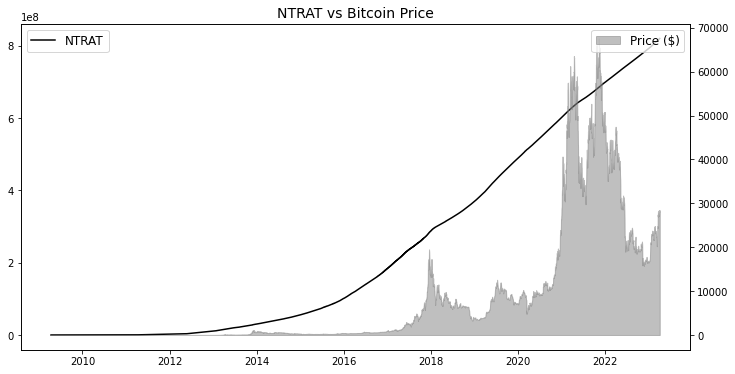

In [9]:
df_to_plot = df_final[['date', 'close']]
df_NTRAT_adj_previous = df_NTRAT.copy()
df_NTRAT_adj_previous = df_NTRAT_adj_previous.reset_index().rename(columns={'Date':'date', 'Value':'NTRAT'})
df_to_plot = pd.merge(df_to_plot, df_NTRAT_adj_previous, on='date', how='inner')
plot_2_axis_2_metrics(df_to_plot, 'NTRAT', 'NTRAT vs Bitcoin Price') 

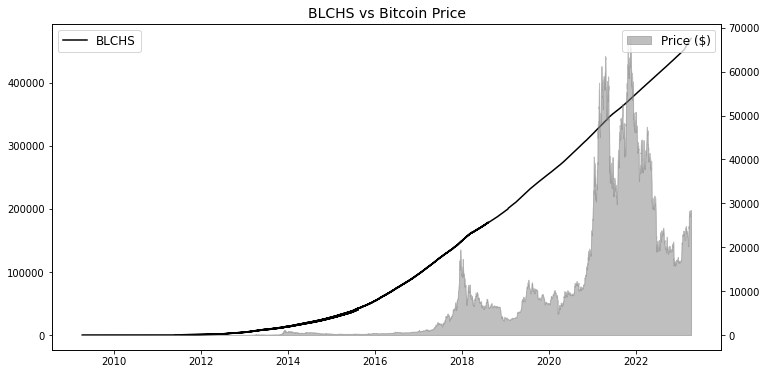

In [11]:
df_to_plot = df_final[['date', 'close']]
df_BLCHS_adj_previous = df_BLCHS.copy()
df_BLCHS_adj_previous = df_BLCHS_adj_previous.reset_index().rename(columns={'Date':'date', 'Value':'BLCHS'})
df_to_plot = pd.merge(df_to_plot, df_BLCHS_adj_previous, on='date', how='inner')
plot_2_axis_2_metrics(df_to_plot, 'BLCHS', 'BLCHS vs Bitcoin Price')

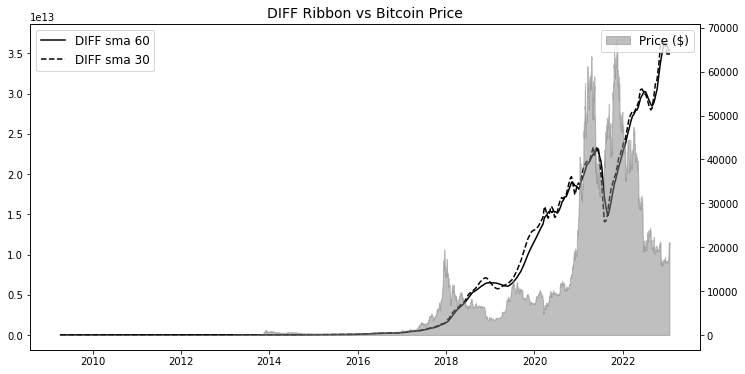

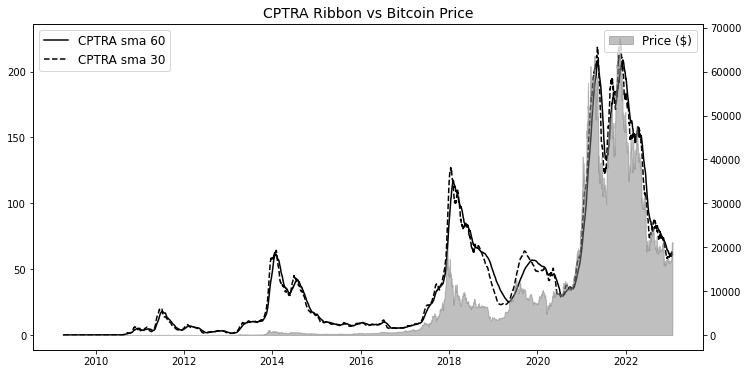

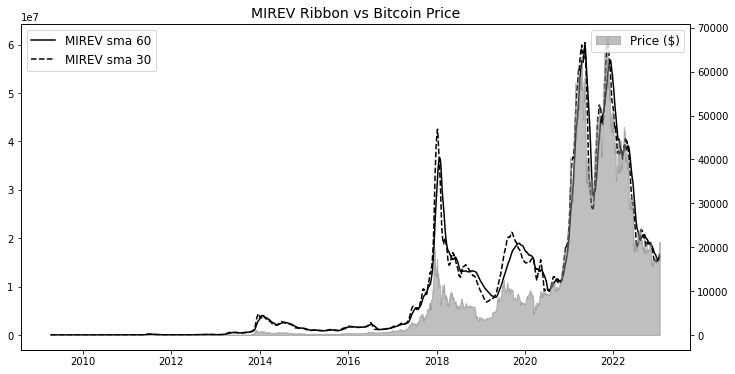

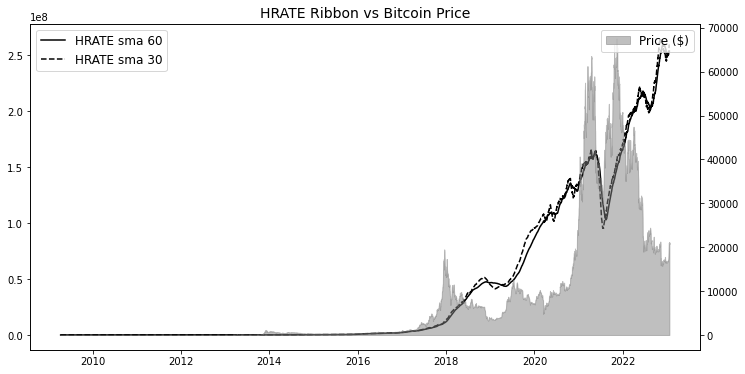

In [8]:
df_cprtra_to_plot = df_final[['date', 'close', 'DIFF_sma_60', 'DIFF_sma_30']]
plot_2_axis_3_metrics(df_cprtra_to_plot, 'DIFF_sma_60', 'DIFF_sma_30', 'DIFF Ribbon vs Bitcoin Price')

df_cprtra_to_plot = df_final[['date', 'close', 'CPTRA_sma_60', 'CPTRA_sma_30']]
plot_2_axis_3_metrics(df_cprtra_to_plot, 'CPTRA_sma_60', 'CPTRA_sma_30', 'CPTRA Ribbon vs Bitcoin Price')

df_cprtra_to_plot = df_final[['date', 'close', 'MIREV_sma_60', 'MIREV_sma_30']]
plot_2_axis_3_metrics(df_cprtra_to_plot, 'MIREV_sma_60', 'MIREV_sma_30', 'MIREV Ribbon vs Bitcoin Price')

df_cprtra_to_plot = df_final[['date', 'close', 'HRATE_sma_60', 'HRATE_sma_30']]
plot_2_axis_3_metrics(df_cprtra_to_plot, 'HRATE_sma_60', 'HRATE_sma_30', 'HRATE Ribbon vs Bitcoin Price')

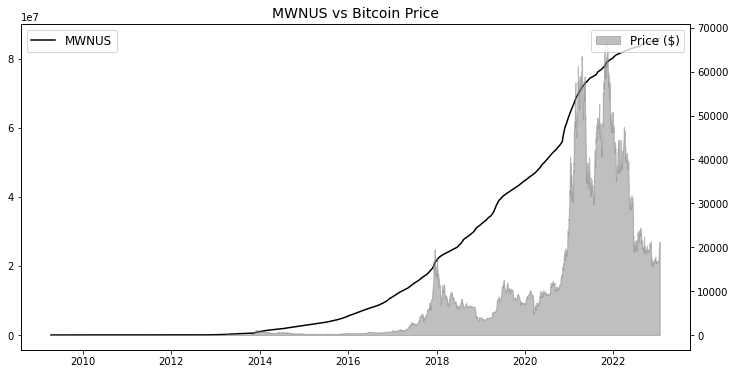

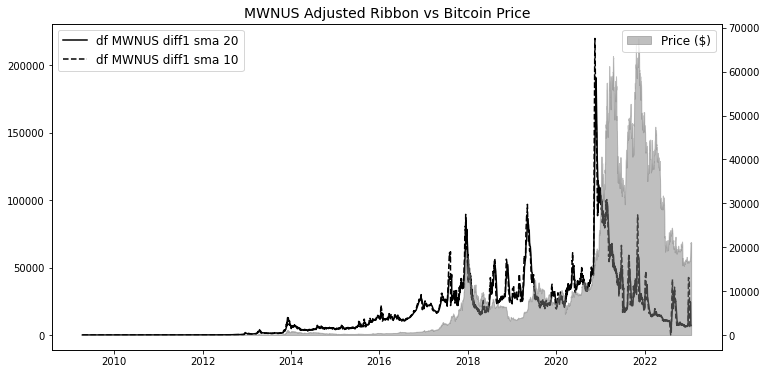

In [9]:
df_to_plot = df_final[['date', 'close']]
df_MWNUS_adj_previous = df_MWNUS.copy()
df_MWNUS_adj_previous = df_MWNUS_adj_previous.reset_index().rename(columns={'Date':'date', 'Value':'MWNUS'})
df_to_plot = pd.merge(df_to_plot, df_MWNUS_adj_previous, on='date', how='inner')
plot_2_axis_2_metrics(df_to_plot, 'MWNUS', 'MWNUS vs Bitcoin Price') 
df_MWNUS_adj_previous = df_MWNUS.copy()
df_MWNUS_adj_previous = df_MWNUS_adj_previous.reset_index().rename(columns={'Date':'date', 'Value':'MWNUS'})
diff_1 = df_MWNUS_adj_previous[['MWNUS']].diff(periods=1).rename(columns={'MWNUS':'df_MWNUS_diff1'})
df_MWNUS_diff = pd.concat([df_MWNUS_adj_previous,diff_1], axis=1).dropna()
df_MWNUS_adj = get_ribbons(df_MWNUS_diff, 10, 20, ['df_MWNUS_diff1'])
df_to_plot = df_final[['date', 'close']]
df_MWNUS_adj=df_MWNUS_adj[['date', 'df_MWNUS_diff1_sma_10', 'df_MWNUS_diff1_sma_20']]
df_to_plot = pd.merge(df_to_plot, df_MWNUS_adj, on='date', how='inner')
plot_2_axis_3_metrics(df_to_plot, 'df_MWNUS_diff1_sma_20', 'df_MWNUS_diff1_sma_10', 'MWNUS Adjusted Ribbon vs Bitcoin Price') 

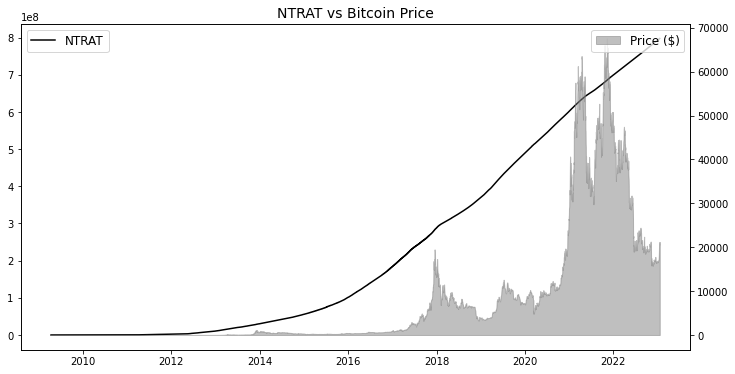

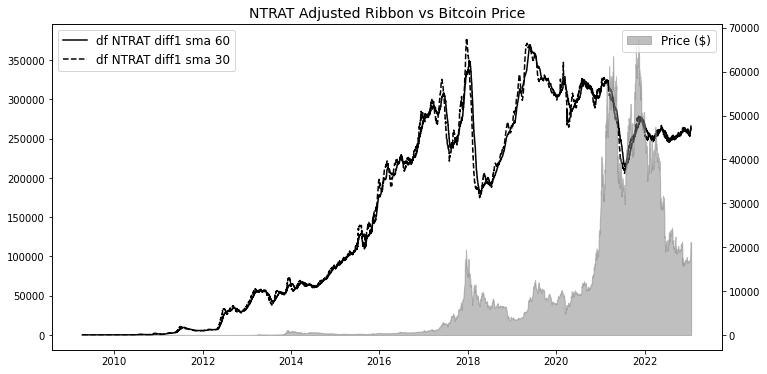

In [10]:
df_to_plot = df_final[['date', 'close']]
df_NTRAT_adj_previous = df_NTRAT.copy()
df_NTRAT_adj_previous = df_NTRAT_adj_previous.reset_index().rename(columns={'Date':'date', 'Value':'NTRAT'})
df_to_plot = pd.merge(df_to_plot, df_NTRAT_adj_previous, on='date', how='inner')
plot_2_axis_2_metrics(df_to_plot, 'NTRAT', 'NTRAT vs Bitcoin Price') 
df_NTRAT_adj_previous = df_NTRAT.copy()
df_NTRAT_adj_previous = df_NTRAT_adj_previous.reset_index().rename(columns={'Date':'date', 'Value':'NTRAT'})
diff_1 = df_NTRAT_adj_previous[['NTRAT']].diff(periods=1).rename(columns={'NTRAT':'df_NTRAT_diff1'})
df_NTRAT_diff = pd.concat([df_NTRAT_adj_previous,diff_1], axis=1).dropna()
df_NTRAT_adj = get_ribbons(df_NTRAT_diff, 30, 60, ['df_NTRAT_diff1'])
df_to_plot = df_final[['date', 'close']]
df_NTRAT_adj=df_NTRAT_adj[['date', 'df_NTRAT_diff1_sma_30', 'df_NTRAT_diff1_sma_60']]
df_to_plot = pd.merge(df_to_plot, df_NTRAT_adj, on='date', how='inner')
plot_2_axis_3_metrics(df_to_plot, 'df_NTRAT_diff1_sma_60', 'df_NTRAT_diff1_sma_30', 'NTRAT Adjusted Ribbon vs Bitcoin Price')

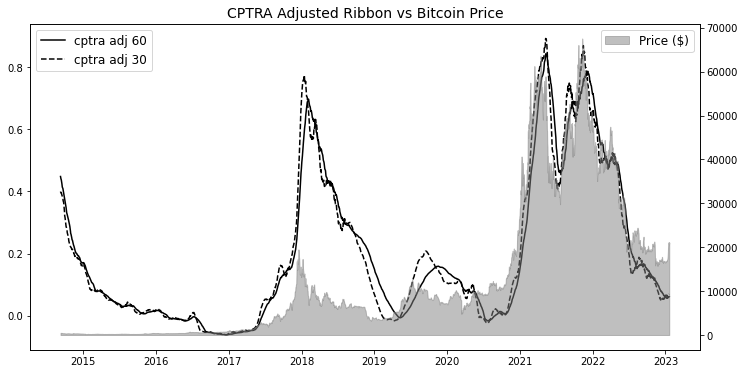

In [19]:
df_to_get_linear = df_final[['date','CPTRA_sma_30']].copy()
df_maximums = create_linear_regression_of_maximums(df_to_get_linear, 'CPTRA_sma_30')
df_minimums = create_linear_regression_of_minimums(df_to_get_linear, 'CPTRA_sma_30')
df_cptra_adj = pd.merge(df_maximums, df_minimums, on='date', how='left')
df_cptra_adj = pd.merge(df_to_get_linear,df_cptra_adj, on='date', how='left')
df_cptra_adj_values = df_cptra_adj[['linear_regression_max_CPTRA_sma_30', 'linear_regression_min_CPTRA_sma_30']]
fill_values = lambda x: (x.shift(1) + x.shift(-1))/2
df_cptra_adj_values = df_cptra_adj_values.apply(lambda x: x.fillna(fill_values(x)))
df_cptra_adj_dates = df_cptra_adj[['date', 'CPTRA_sma_30']]
# Hasta aqui no cambia
df_cptra_adj = pd.merge(df_cptra_adj_dates, df_cptra_adj_values, left_index=True, right_index=True) 
df_cptra_adj['cptra_adj'] = (df_cptra_adj['CPTRA_sma_30'] - df_cptra_adj['linear_regression_min_CPTRA_sma_30'])  / df_cptra_adj['linear_regression_max_CPTRA_sma_30']
df_cptra_adj['cptra_adj'] = (df_cptra_adj['CPTRA_sma_30'] - df_cptra_adj['linear_regression_min_CPTRA_sma_30'])  / df_cptra_adj['linear_regression_max_CPTRA_sma_30']
df_cptra_adj_30 = df_cptra_adj[['date', 'cptra_adj']].rename(columns={'cptra_adj':'cptra_adj_30'}).dropna().copy()
df_cptra_adj_dates = df_final[['date', 'CPTRA_sma_60']].copy()
df_cptra_adj = pd.merge(df_cptra_adj_dates, df_cptra_adj_values, left_index=True, right_index=True) 
df_cptra_adj['cptra_adj'] = (df_cptra_adj['CPTRA_sma_60'] - df_cptra_adj['linear_regression_min_CPTRA_sma_30'])  / df_cptra_adj['linear_regression_max_CPTRA_sma_30']
df_cptra_adj['cptra_adj'] = (df_cptra_adj['CPTRA_sma_60'] - df_cptra_adj['linear_regression_min_CPTRA_sma_30'])  / df_cptra_adj['linear_regression_max_CPTRA_sma_30']
df_cptra_adj_60 = df_cptra_adj[['date', 'cptra_adj']].rename(columns={'cptra_adj':'cptra_adj_60'}).dropna().copy()
df_to_plot = df_final[['date', 'close']]
df_to_plot = pd.merge(df_to_plot, df_cptra_adj_60, on='date', how='inner')
df_to_plot = pd.merge(df_to_plot, df_cptra_adj_30, on='date', how='inner')
plot_2_axis_3_metrics(df_to_plot, 'cptra_adj_60', 'cptra_adj_30', 'CPTRA Adjusted Ribbon vs Bitcoin Price') 

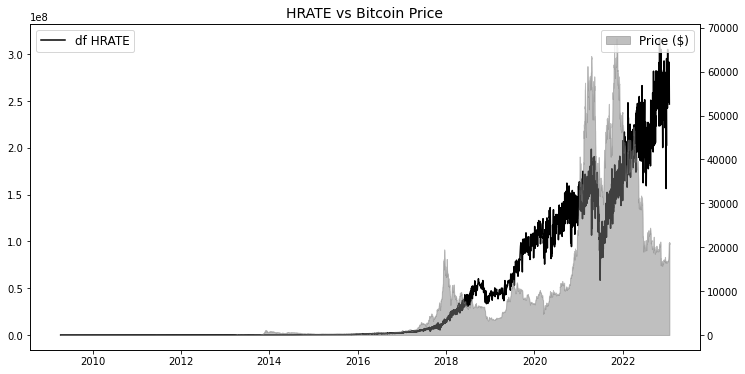

In [20]:
df_HRATE = quandl.get("BCHAIN/HRATE", authtoken="soxd-469x3Zp4ib_4uzc")
df_to_plot = df_final[['date', 'close']]
df_HRATE_adj_previous = df_HRATE.copy()
df_HRATE_adj_previous = df_HRATE_adj_previous.reset_index().rename(columns={'Date':'date', 'Value':'df_HRATE'})
df_to_plot = pd.merge(df_to_plot, df_HRATE_adj_previous, on='date', how='inner')
df_to_plot = df_to_plot[['date','df_HRATE', 'close']]
plot_2_axis_2_metrics(df_to_plot, 'df_HRATE', 'HRATE vs Bitcoin Price')

In [42]:
df_to_plot[df_to_plot['date']=='2010-08-16']

,date,df_HRATE,close
491,2010-08-16,0.003333,0.0769
